## Generate Dataset

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=10, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset


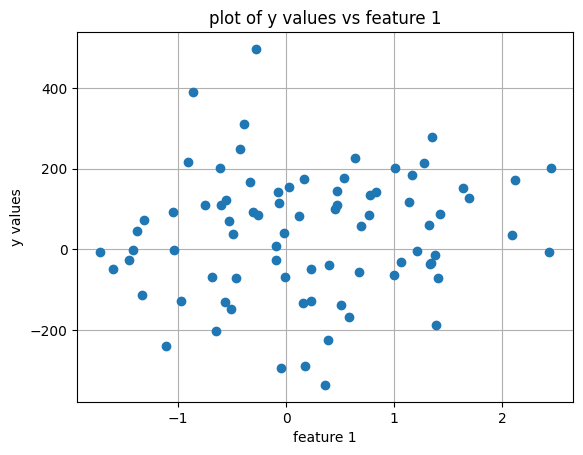

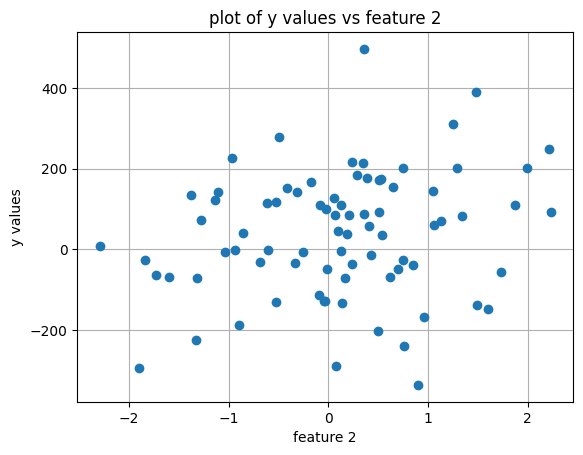

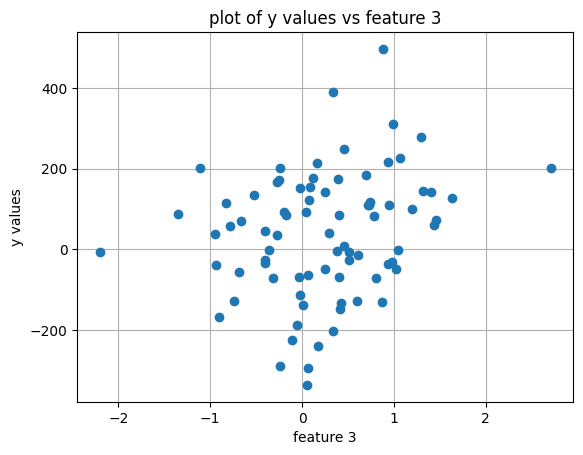

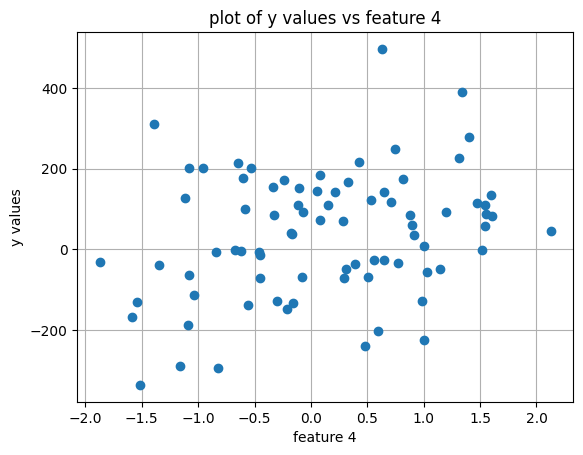

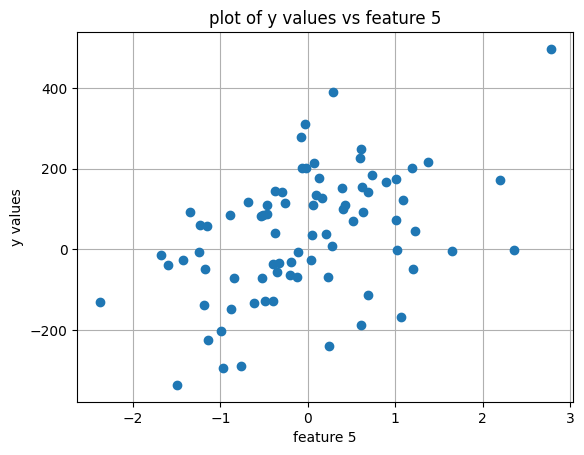

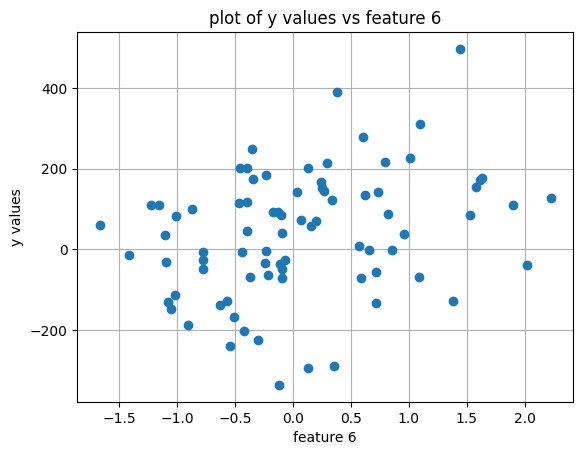

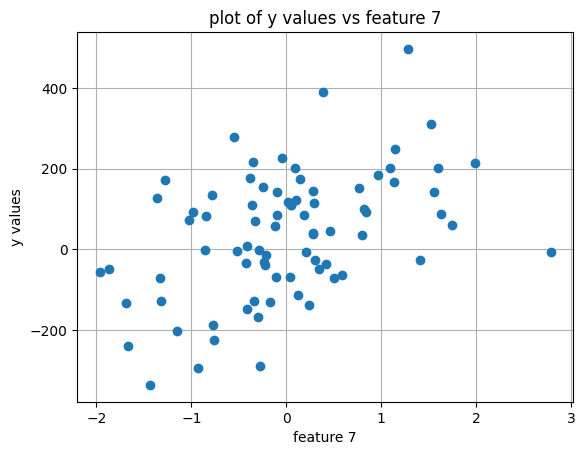

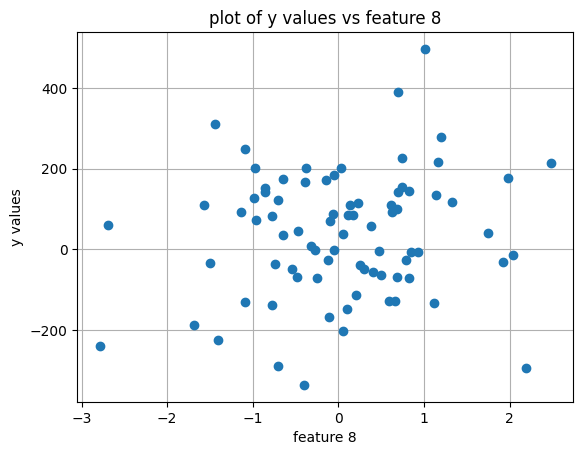

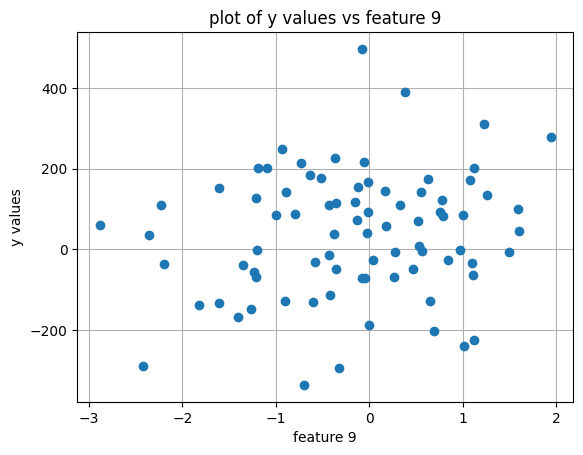

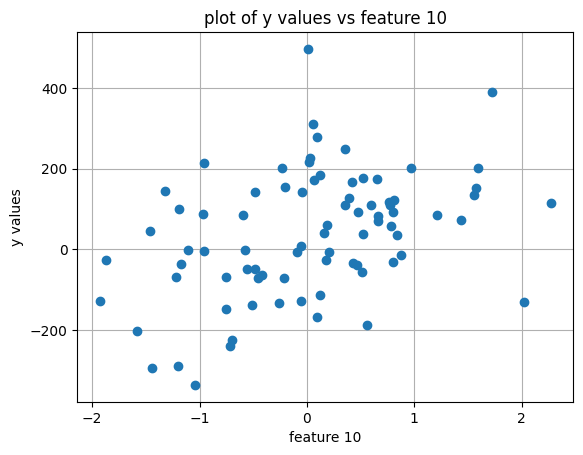

In [ ]:
import matplotlib.pyplot as plt
ypts = y_train
for i in range(X_train.shape[1]):
  lst=[]
  for j in range(X_train.shape[0]):
      lst.append(X_train[j][i])
  xpts = lst
  plt.title(f"plot of y values vs feature {i+1}")
  plt.plot(xpts,ypts,'o')
  plt.grid()
  plt.xlabel(f"feature {i+1}")
  plt.ylabel("y values")
  plt.show()
# Your code here

## Model Definition

Using TensorFlow, building a model with the following definition:
> Input of shape 10 \\
> Dense of shape 10 \\
> Dense of shape 5 \\
Dense of shape 3 \\
> Dense of shape 1 \\

We will use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

We will use Gradient Decay with appropriate parameters

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers



model = keras.Sequential(layers = [layers.Dense(10, input_shape = (10,), name="input"),
                                   layers.Dense(50, activation="relu",name="layer1"),
                                   layers.Dense(10, activation="relu",name="layer2"),
                                   layers.Dense(5, activation="relu",name="layer3"),
                                   layers.Dense(1,name="output")]
                                   ,name = "sequential_model",)
sgd = tf.keras.optimizers.SGD(learning_rate =0.0001)

model.compile(optimizer=sgd,
              loss = tf.keras.losses.MeanAbsoluteError())
model.summary()


# Your code here

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                110       
                                                                 
 layer1 (Dense)              (None, 50)                550       
                                                                 
 layer2 (Dense)              (None, 10)                510       
                                                                 
 layer3 (Dense)              (None, 5)                 55        
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 127.2951 - val_loss: 139.6560
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 127.2949 - val_loss: 139.6559
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 127.2948 - val_loss: 139.6558
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 127.2946 - val_loss: 139.6557
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 127.2944 - val_loss: 139.6556
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 127.2943 - val_loss: 139.6555
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 127.2941 - val_loss: 139.6554
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 127.2940 - val_loss: 139.6552
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 127.2938 - val_loss: 139.6552
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 127.2936 - val_los

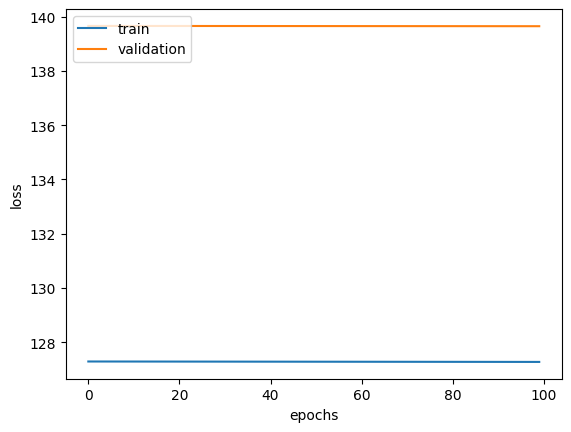

In [ ]:
# Your code here
result = model.fit(X_train,y_train , batch_size = 10, epochs = 100, validation_data=(X_test,y_test))
def plot(inp):
  plt.plot(result.history[inp])
  plt.plot(result.history[f"val_{inp}"])
  plt.ylabel(f"{inp}")
  plt.legend(["train","validation"], loc="upper left")
  plt.xlabel("epochs")
  plt.show()
plot("loss")

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [ ]:
# Insert the function for R2 Score
y_pred = model(X_train)
MAE = tf.keras.losses.MeanAbsoluteError()
MAE = np.array(MAE(y_test,y_pred))
print(MAE)

def r2_score(y_true, y_pred):


    # return the r2 score
       mean = y_true.sum()/len(y_true)
       r = 0
       for i in range(len(y_true)):
          r += (y_true[i] - mean)**2
       ms = MAE*len(y_true)
       r2 = 1 - ms/r
       return r2

accu = r2_score(y_test, y_pred)
print("Accuracy:", accu)

139.66426
Accuracy: 0.9947906888098059
